In [365]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [366]:
firstDf = pd.read_csv('discover12.csv')

In [367]:
firstDf.head()

,Trans. Date,Post Date,Description,Amount,Category
0,02/19/2023,02/19/2023,INTERNET PAYMENT - THANK YOU,-422.20,Payments and Credits
1,02/21/2023,02/21/2023,CHIPOTLE 1391 ALBANY NYGOOGLE PAY ENDING IN 4969,10.37,Restaurants
2,02/22/2023,02/22/2023,PAYPAL *SPOTIFYUSAI 402-935-7733 CA,4.99,Services
3,02/23/2023,02/23/2023,ASIAN SUPERMARKET GROUP ALBANY NY,113.45,Supermarkets
4,02/27/2023,02/27/2023,PANERA SUBD 203162 O 518-276-2030 NY1611675180...,3.60,Restaurants


In [368]:
print(firstDf["Category"].unique())

['Payments and Credits' 'Restaurants' 'Services' 'Supermarkets'
 'Awards and Rebate Credits' 'Education' 'Gasoline' 'Merchandise'
 'Travel/ Entertainment' 'Automotive' 'Warehouse Clubs' 'Medical Services']


In [369]:
firstDf.replace({"Warehouse Clubs": "Groceries"}, regex=True)
firstDf.replace({"Supermarkets": "Groceries"}, regex=True)
firstDf.replace({"Merchandise": "Online Shopping"}, regex=True)
firstDf.replace({"Gasoline": "Transportation"}, regex=True)
firstDf.replace({"Services": "Utility"}, regex=True)

firstDf['Category'] = np.where(firstDf['Category'] == "Warehouse Clubs","Groceries",firstDf['Category'])
firstDf['Category'] = np.where(firstDf['Category'] == "Supermarkets","Groceries",firstDf['Category'])
firstDf['Category'] = np.where(firstDf['Category'] == "Merchandise","Online Shopping",firstDf['Category'])
firstDf['Category'] = np.where(firstDf['Category'] == "Gasoline","Transportation",firstDf['Category'])
firstDf['Category'] = np.where(firstDf['Category'] == "Gasoline","Transportation",firstDf['Category'])






In [370]:

df_new = firstDf[ (firstDf['Category'].isin(["Restaurants","Transportation", "Groceries", "Online Shopping", "Utility"]))]
df_new

,Trans. Date,Post Date,Description,Amount,Category
1,02/21/2023,02/21/2023,CHIPOTLE 1391 ALBANY NYGOOGLE PAY ENDING IN 4969,10.37,Restaurants
3,02/23/2023,02/23/2023,ASIAN SUPERMARKET GROUP ALBANY NY,113.45,Groceries
4,02/27/2023,02/27/2023,PANERA SUBD 203162 O 518-276-2030 NY1611675180...,3.60,Restaurants
5,03/03/2023,03/03/2023,KARAVALLI REG.CUISINE OF LATHAM NY,27.82,Restaurants
6,03/06/2023,03/06/2023,ACTON COFFEE HOUSE ACTON MA,3.07,Restaurants
...,...,...,...,...,...
374,02/07/2024,02/07/2024,AMZN MKTP US*RB9D28J22 AMZN.COM/BILLWA25UXUURHVAI,12.61,Online Shopping
375,02/07/2024,02/07/2024,RPI ARGO TEA TROY NY,3.40,Restaurants
376,02/10/2024,02/10/2024,SQ *STACKS ESPRESSO LL TROY NY0002305843019264...,4.26,Restaurants
377,02/10/2024,02/10/2024,THE PLACID BAKER TROY NY,8.63,Restaurants


In [371]:
grocery = set(["snacks", "Grocery", "Milk", "Sweets", "curd", "vegtables", "fruits", "Potato", "Onions", "Eggs", "Bread", "Water"])

In [372]:
for index, row in df_new.iterrows():
    tmp = row["Trans. Date"]
    tmp2 = tmp.split('/')
    print(tmp2)
    dateRl = tmp2[2] + '-' + tmp2[0] + '-' + tmp2[1]
    df_new.at[index, "Trans. Date"] = dateRl

['02', '21', '2023']
['02', '23', '2023']
['02', '27', '2023']
['03', '03', '2023']
['03', '06', '2023']
['03', '09', '2023']
['03', '12', '2023']
['03', '13', '2023']
['03', '18', '2023']
['03', '25', '2023']
['03', '25', '2023']
['03', '29', '2023']
['04', '03', '2023']
['04', '05', '2023']
['04', '07', '2023']
['04', '08', '2023']
['04', '09', '2023']
['04', '10', '2023']
['04', '11', '2023']
['04', '13', '2023']
['04', '13', '2023']
['04', '13', '2023']
['04', '14', '2023']
['04', '16', '2023']
['04', '17', '2023']
['04', '17', '2023']
['04', '19', '2023']
['04', '20', '2023']
['04', '20', '2023']
['04', '21', '2023']
['04', '21', '2023']
['04', '22', '2023']
['04', '23', '2023']
['04', '23', '2023']
['04', '25', '2023']
['04', '25', '2023']
['04', '26', '2023']
['04', '26', '2023']
['04', '27', '2023']
['04', '27', '2023']
['04', '28', '2023']
['04', '29', '2023']
['04', '30', '2023']
['05', '03', '2023']
['05', '04', '2023']
['05', '05', '2023']
['05', '07', '2023']
['05', '07', 

In [373]:
df_new.rename(columns = {'Trans. Date':'Date'}, inplace = True)
df_new

/var/folders/06/535t6j8x0k71hd92gljsgt6h0000gn/T/ipykernel_77696/3224285364.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.rename(columns = {'Trans. Date':'Date'}, inplace = True)


,Date,Post Date,Description,Amount,Category
1,2023-02-21,02/21/2023,CHIPOTLE 1391 ALBANY NYGOOGLE PAY ENDING IN 4969,10.37,Restaurants
3,2023-02-23,02/23/2023,ASIAN SUPERMARKET GROUP ALBANY NY,113.45,Groceries
4,2023-02-27,02/27/2023,PANERA SUBD 203162 O 518-276-2030 NY1611675180...,3.60,Restaurants
5,2023-03-03,03/03/2023,KARAVALLI REG.CUISINE OF LATHAM NY,27.82,Restaurants
6,2023-03-06,03/06/2023,ACTON COFFEE HOUSE ACTON MA,3.07,Restaurants
...,...,...,...,...,...
374,2024-02-07,02/07/2024,AMZN MKTP US*RB9D28J22 AMZN.COM/BILLWA25UXUURHVAI,12.61,Online Shopping
375,2024-02-07,02/07/2024,RPI ARGO TEA TROY NY,3.40,Restaurants
376,2024-02-10,02/10/2024,SQ *STACKS ESPRESSO LL TROY NY0002305843019264...,4.26,Restaurants
377,2024-02-10,02/10/2024,THE PLACID BAKER TROY NY,8.63,Restaurants


In [374]:
df_new.columns

Index(['Date', 'Post Date', 'Description', 'Amount', 'Category'], dtype='object')

In [375]:
df_new = df_new.drop('Post Date', axis=1)
df_new = df_new.drop('Description', axis=1)
result = df_new.groupby(['Date', 'Category']).sum().reset_index()
result


,Date,Category,Amount
0,2023-02-21,Restaurants,10.37
1,2023-02-23,Groceries,113.45
2,2023-02-27,Restaurants,3.60
3,2023-03-03,Restaurants,27.82
4,2023-03-06,Restaurants,3.07
...,...,...,...
198,2024-02-06,Restaurants,10.48
199,2024-02-07,Online Shopping,12.61
200,2024-02-07,Restaurants,3.40
201,2024-02-10,Restaurants,12.89


In [379]:
unique_dates = df_new['Date'].unique()
unique_categories = df_new['Category'].unique()

all_combinations = pd.MultiIndex.from_product([unique_dates, unique_categories], names=['Date', 'Category']).to_frame(index=False)
df_full = all_combinations.merge(df_new, on=['Date', 'Category'], how='left').fillna(0)
result = df_full.groupby(['Date', 'Category']).sum().reset_index()

pivot_df = result.pivot(index='Date', columns='Category', values='Amount').fillna(0)
pivot_df.reset_index(inplace=True)

pivot_df.to_csv("modifiedDiscover.csv", index=False)

In [383]:
discoverDf = pd.read_csv("modifiedDiscoverReal.csv")
discoverDf = discoverDf.loc[:,['Date','Restaurants', 'Online Shopping','Groceries','Utility']]
discoverDf = discoverDf.rename(columns={'Restaurants': 'Food'})
discoverDf.to_csv("modifiedDiscoverReal.csv", index=False)

In [433]:
discoverDf5 = pd.read_csv("modifiedDiscoverReal.csv")
discoverDf5['Date'] = pd.to_datetime(discoverDf5['Date'])
discoverDf5.set_index('Date', inplace=True)
rolling_averages = discoverDf5.rolling('5D').mean()
rolling_averages_filtered = rolling_averages.iloc[4::5]
rolling_averages_filtered = rolling_averages_filtered.reset_index()
rolling_averages_filtered.to_csv("modifiedDiscoverReal55.csv", index=False)


In [399]:
discoverDf12 = pd.read_csv("modifiedDiscoverReal.csv")
discoverDf12['Date'] = pd.to_datetime(discoverDf12['Date'])
discoverDf12 = discoverDf12.groupby(pd.Grouper(key='Date', freq='M')).mean().reset_index()

discoverDf12

,Date,Food,Online Shopping,Groceries,Utility
0,2023-02-28,3.492500,0.000000,28.362500,1.247500
1,2023-03-31,3.832222,0.000000,19.665556,17.775556
2,2023-04-30,20.668636,2.357273,0.754545,4.545455
3,2023-05-31,12.865500,6.473500,2.664000,0.000000
4,2023-06-30,28.790870,0.606957,3.017391,1.739130
5,2023-07-31,26.795385,0.971538,4.201154,0.769231
6,2023-08-31,17.097333,20.716000,19.127333,0.200000
7,2023-09-30,7.169231,24.594615,23.350000,2.226154
8,2023-10-31,0.000000,50.348333,0.000000,10.663333
9,2023-11-30,1.503333,56.175000,0.000000,5.833333


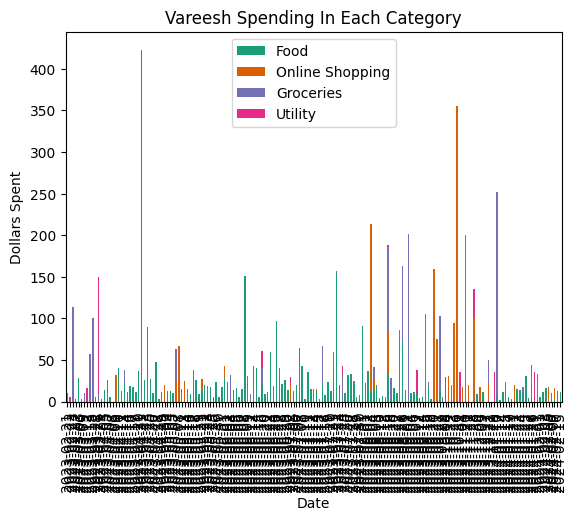

<Figure size 1000x60 with 0 Axes>

In [428]:


colors = ['r','b','g','y']

color_dict = {'Food': '#1b9e77', 'Online Shopping': '#d95f02', 'Groceries':'#7570b3','Utility':'#e7298a'}
tmp = discoverDf.columns
tmp = tmp[1:]
discoverDf.plot(x='Date', kind='bar', stacked=True,
        title='Vareesh Spending In Each Category', ylabel="Dollars Spent", color=[color_dict.get(x, '#333333') for x in tmp])
plt.figure(figsize=(100,6), dpi = 10)
plt.show()

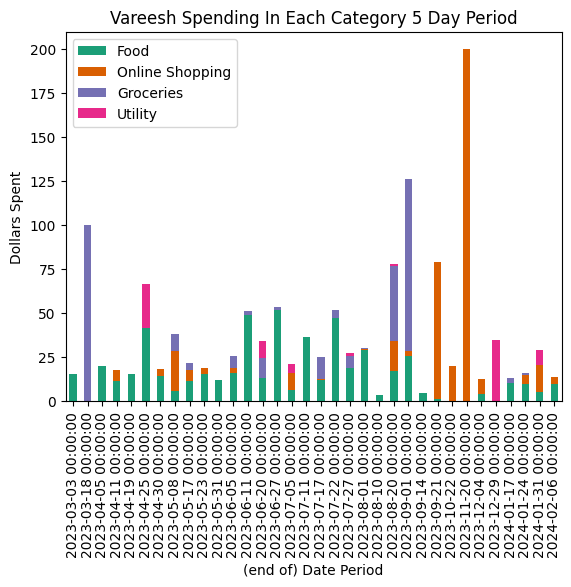

<Figure size 1000x60 with 0 Axes>

In [441]:


colors = ['r','b','g','y']

color_dict = {'Food': '#1b9e77', 'Online Shopping': '#d95f02', 'Groceries':'#7570b3','Utility':'#e7298a'}
tmp = rolling_averages_filtered.columns
tmp = tmp[1:]
rolling_averages_filtered.plot(x='Date', kind='bar', stacked=True,
        title='Vareesh Spending In Each Category 5 Day Period', ylabel="Dollars Spent",xlabel="(end of) Date Period", color=[color_dict.get(x, '#333333') for x in tmp])
plt.figure(figsize=(100,6), dpi = 10)
plt.show()